# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

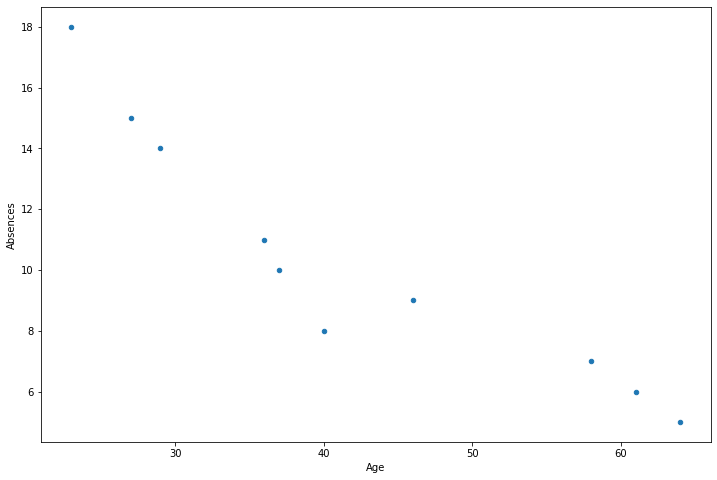

In [7]:
data = pd.read_csv("../data/absences.csv")
data.head()

age_list = list(data.Age)
absences_list = list(data.Absences)

data.plot.scatter(x='Age',y='Absences', figsize=(12,8))

In [8]:
'''

The older the people, the less likely to be absent

'''

'\n\nThe older the people, the less likely to be absent\n\n'

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [16]:

def slope_intercept_regresionline(x,y):
    
    d_xy = sum(y*x) - (len(x)*(sum(x)/len(x))*(sum(y)/len(y)))
    d_xx = sum(x*x) - (len(x)*(sum(x)/len(x))*(sum(x)/len(x)))

    dc_1 = d_xy / d_xx 
    dc_2 = (sum(y)/len(y)) - dc_1*(sum(x)/len(x))
    
    plt.scatter(x, y) 
    predicted_y = dc_2 + dc_1 * x 
    plt.plot(x, predicted_y) 
    plt.xlabel('Age') 
    plt.ylabel('Absences') 
    plt.show() 

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

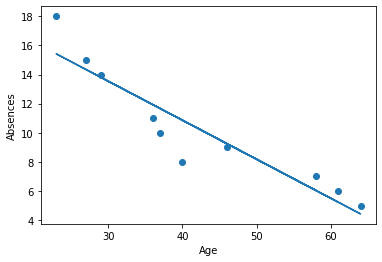

In [17]:
slope_intercept_regresionline(data['Age'], data['Absences'])

In [18]:
'''
Regression line is negative
'''

'\nRegression line is negative\n'

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [23]:
def covariance_and_correlation(x, y):
    x_mean = (sum(x)/len(x))
    y_mean = (sum(y)/len(y))
    
    data = [(x[i] - x_mean) * (y[i] - y_mean) for i in range(len(x))]
    
    covariance = sum(data) / (len(data) - 1)

    std1 = x.std()
    std2 = y.std()
    
    correlation = (covariance/(std1*std2))
    
    return covariance, correlation

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [24]:
covariance_and_correlation(data['Absences'], data['Age'])

(-57.699999999999996, -0.9325434092481012)

In [25]:
'''
The covariance is negative, which means that when x increases, y decreases

The correlation is also negative, which means that the age and the absence
are negatively correlated, being this very strongly due to the value is 
close to -1

'''

'\nThe covariance is negative, which means that when x increases, y decreases\n\nThe correlation is also negative, which means that the age and the absence\nare negatively correlated, being this very strongly due to the value is \nclose to -1\n\n'

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [26]:
'''
We can say that the hypothesis is correct, the younger the employee
the more likely they are goint to have a big amount of absences

'''

'\nWe can say that the hypothesis is correct, the younger the employee\nthe more likely they are goint to have a big amount of absences\n\n'

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [27]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [29]:
covariance_and_correlation(ironbeers_df['X'], ironbeers_df['Y'])

(12.0, 0.9770084209183943)

In [ ]:
'''
These two variables are positively and strongly correlated, with a 
positive covariance.
'''

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

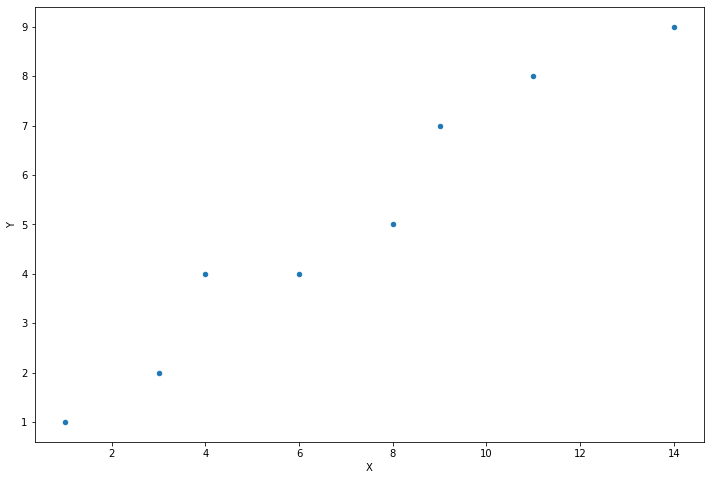

In [30]:
ironbeers_df.plot.scatter(x='X',y='Y', figsize=(12,8))

In [ ]:
'''
The higher the number of people you ask to stay, the more they stay
'''

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

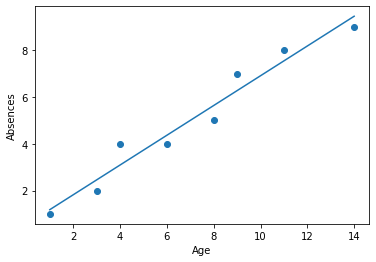

In [31]:
slope_intercept_regresionline(ironbeers_df['X'], ironbeers_df['Y'])

In [32]:
'''
The regression line is clearly possitive
'''

'\nThe regression line is clearly possitive\n'

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [ ]:
'''
The hypothesis of 'the more people you ask to stay, the more they stay'
is correct, because there is a positive correlation between those
two variables
'''

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [ ]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [ ]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [ ]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [ ]:
# your code here

In [ ]:
# your comments here